In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# data preparation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# classifiers
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import Perceptron

# to compare and evaluate our classifiers
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
import itertools
from sklearn.model_selection import GridSearchCV

# tree plot
from sklearn import tree
import graphviz

#ignore warnings for now
import warnings
warnings.filterwarnings('ignore')

Matplotlib created a temporary config/cache directory at /var/folders/73/0j93mrvd1s77hv6p1fbfrqz80000gn/T/matplotlib-zqvfkjxr because the default path (/Users/anatlevari/.matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [2]:
df = pd.read_csv('/Users/anatlevari/Downloads/heart_clean.csv')

# Classification 


In this notebook, different classification algorithms will be implemented on the Heart Failure dataset. They are compared according to the recall and accuracy metrics. The recall value, in my opinion, is the most important in this case since the goal is to reduce the false-negative number as much as possible. Reducing False-positives is less critical in this case due to the nature of the preventing treatment.

In addition, even though Naive Bayes is a commonly used classification algorithm, it will not be used here since there is a correlation in the data features (as can be seen in the previous notebook - 'Heart Failure Insights').

## Data Preparation
For some of the algorithms, transforming the categorical features into numerical ones is essential. This replacement is implemented below, with the separation of the data into train and test sets. Scaling is also applied since some algorithms (SVM/KNN) depend on euclidean distance. The other are invariant to feature scaling.

In [3]:
# get the different values of the catagorical features
df['Sex'].unique()
df['ChestPainType'].unique()
df['RestingECG'].unique()
df['ExerciseAngina'].unique()
df['ST_Slope'].unique()

# replace non numerical features with numerical ones
df = df.replace(['F', 'M'], [0,1])
df = df.replace(['ATA', 'NAP', 'ASY', 'TA'], [0,1,2,3])
df = df.replace(['Normal', 'ST', 'LVH'], [0,1,2])
df = df.replace(['N', 'Y'], [0,1])
df = df.replace(['Up', 'Flat', 'Down'], [0,1,2])

In [4]:
# Separate input (X) to output (y)
X = df.iloc[:,:-1].values  #input
y = df.iloc[:, 11].values  # output - target

# divide the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=0)

# scale 
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

## SVM Algorithm

In [5]:
svm = SVC()
svm.fit(X_train, y_train)

# accuracy of svm
svm_acc_train = round(svm.score(X_train,y_train)*100, 2)
svm_acc_test = round(svm.score(X_test,y_test)*100, 2)

print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm_acc_train))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm_acc_test))

y_preds = svm.predict(X_test)
recall_svm = round(recall_score(y_test, y_preds)*100, 2)

print('Recall of SVM classifier: {:.2f}'.format(recall_svm))

Accuracy of SVM classifier on training set: 88.69
Accuracy of SVM classifier on test set: 90.71
Recall of SVM classifier: 91.01


## Logistic Regression

In [6]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# accuracy of logreg
logreg_acc_train = round(logreg.score(X_train,y_train)*100, 2)
logreg_acc_test = round(logreg.score(X_test,y_test)*100, 2)


print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logreg_acc_train))
print('Accuracy of Logistic Regression classifier on test set: {:.2f}'
     .format(logreg_acc_test))

# recall calculation
y_preds = logreg.predict(X_test)
recall_logreg = round(recall_score(y_test, y_preds)*100, 2)

print('Recall of logreg classifier: {:.2f}'.format(recall_logreg))

Accuracy of Logistic Regression classifier on training set: 84.49
Accuracy of Logistic Regression classifier on test set: 87.98
Recall of logreg classifier: 86.52


## KNN Algorithm

In [7]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# accuracy of knn
knn_acc_train = round(knn.score(X_train,y_train)*100, 2)
knn_acc_test = round(knn.score(X_test,y_test)*100, 2)

print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn_acc_train))
print('Accuracy of KNN classifier on test set: {:.2f}'
     .format(knn_acc_test))

# recall calculation
y_preds = knn.predict(X_test)
recall_knn = round(recall_score(y_test, y_preds)*100, 2)

print('Recall of knn classifier: {:.2f}'.format(recall_knn))

Accuracy of KNN classifier on training set: 87.77
Accuracy of KNN classifier on test set: 88.52
Recall of knn classifier: 88.76


## Decision Tree Algorithm

In [8]:
# max_depth is set to 3 for easy visualization later
clf = DecisionTreeClassifier(max_depth=3)
clf = clf.fit(X_train, y_train)

# decision tree accuracy
clf_acc_train = round(clf.score(X_train,y_train)*100, 2) 
clf_acc_test = round(clf.score(X_test,y_test)*100, 2) 

print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf_acc_train))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf_acc_test))

# recall calculation
y_preds = clf.predict(X_test)
recall_clf = round(recall_score(y_test, y_preds)*100, 2)

print('Recall of Decision tree classifier: {:.2f}'.format(recall_clf))

Accuracy of Decision Tree classifier on training set: 85.40
Accuracy of Decision Tree classifier on test set: 81.97
Recall of Decision tree classifier: 80.90


## Visualization
Decision tree allow us to visualize and interpret your results. Below, the decision tree is plotted and explained:

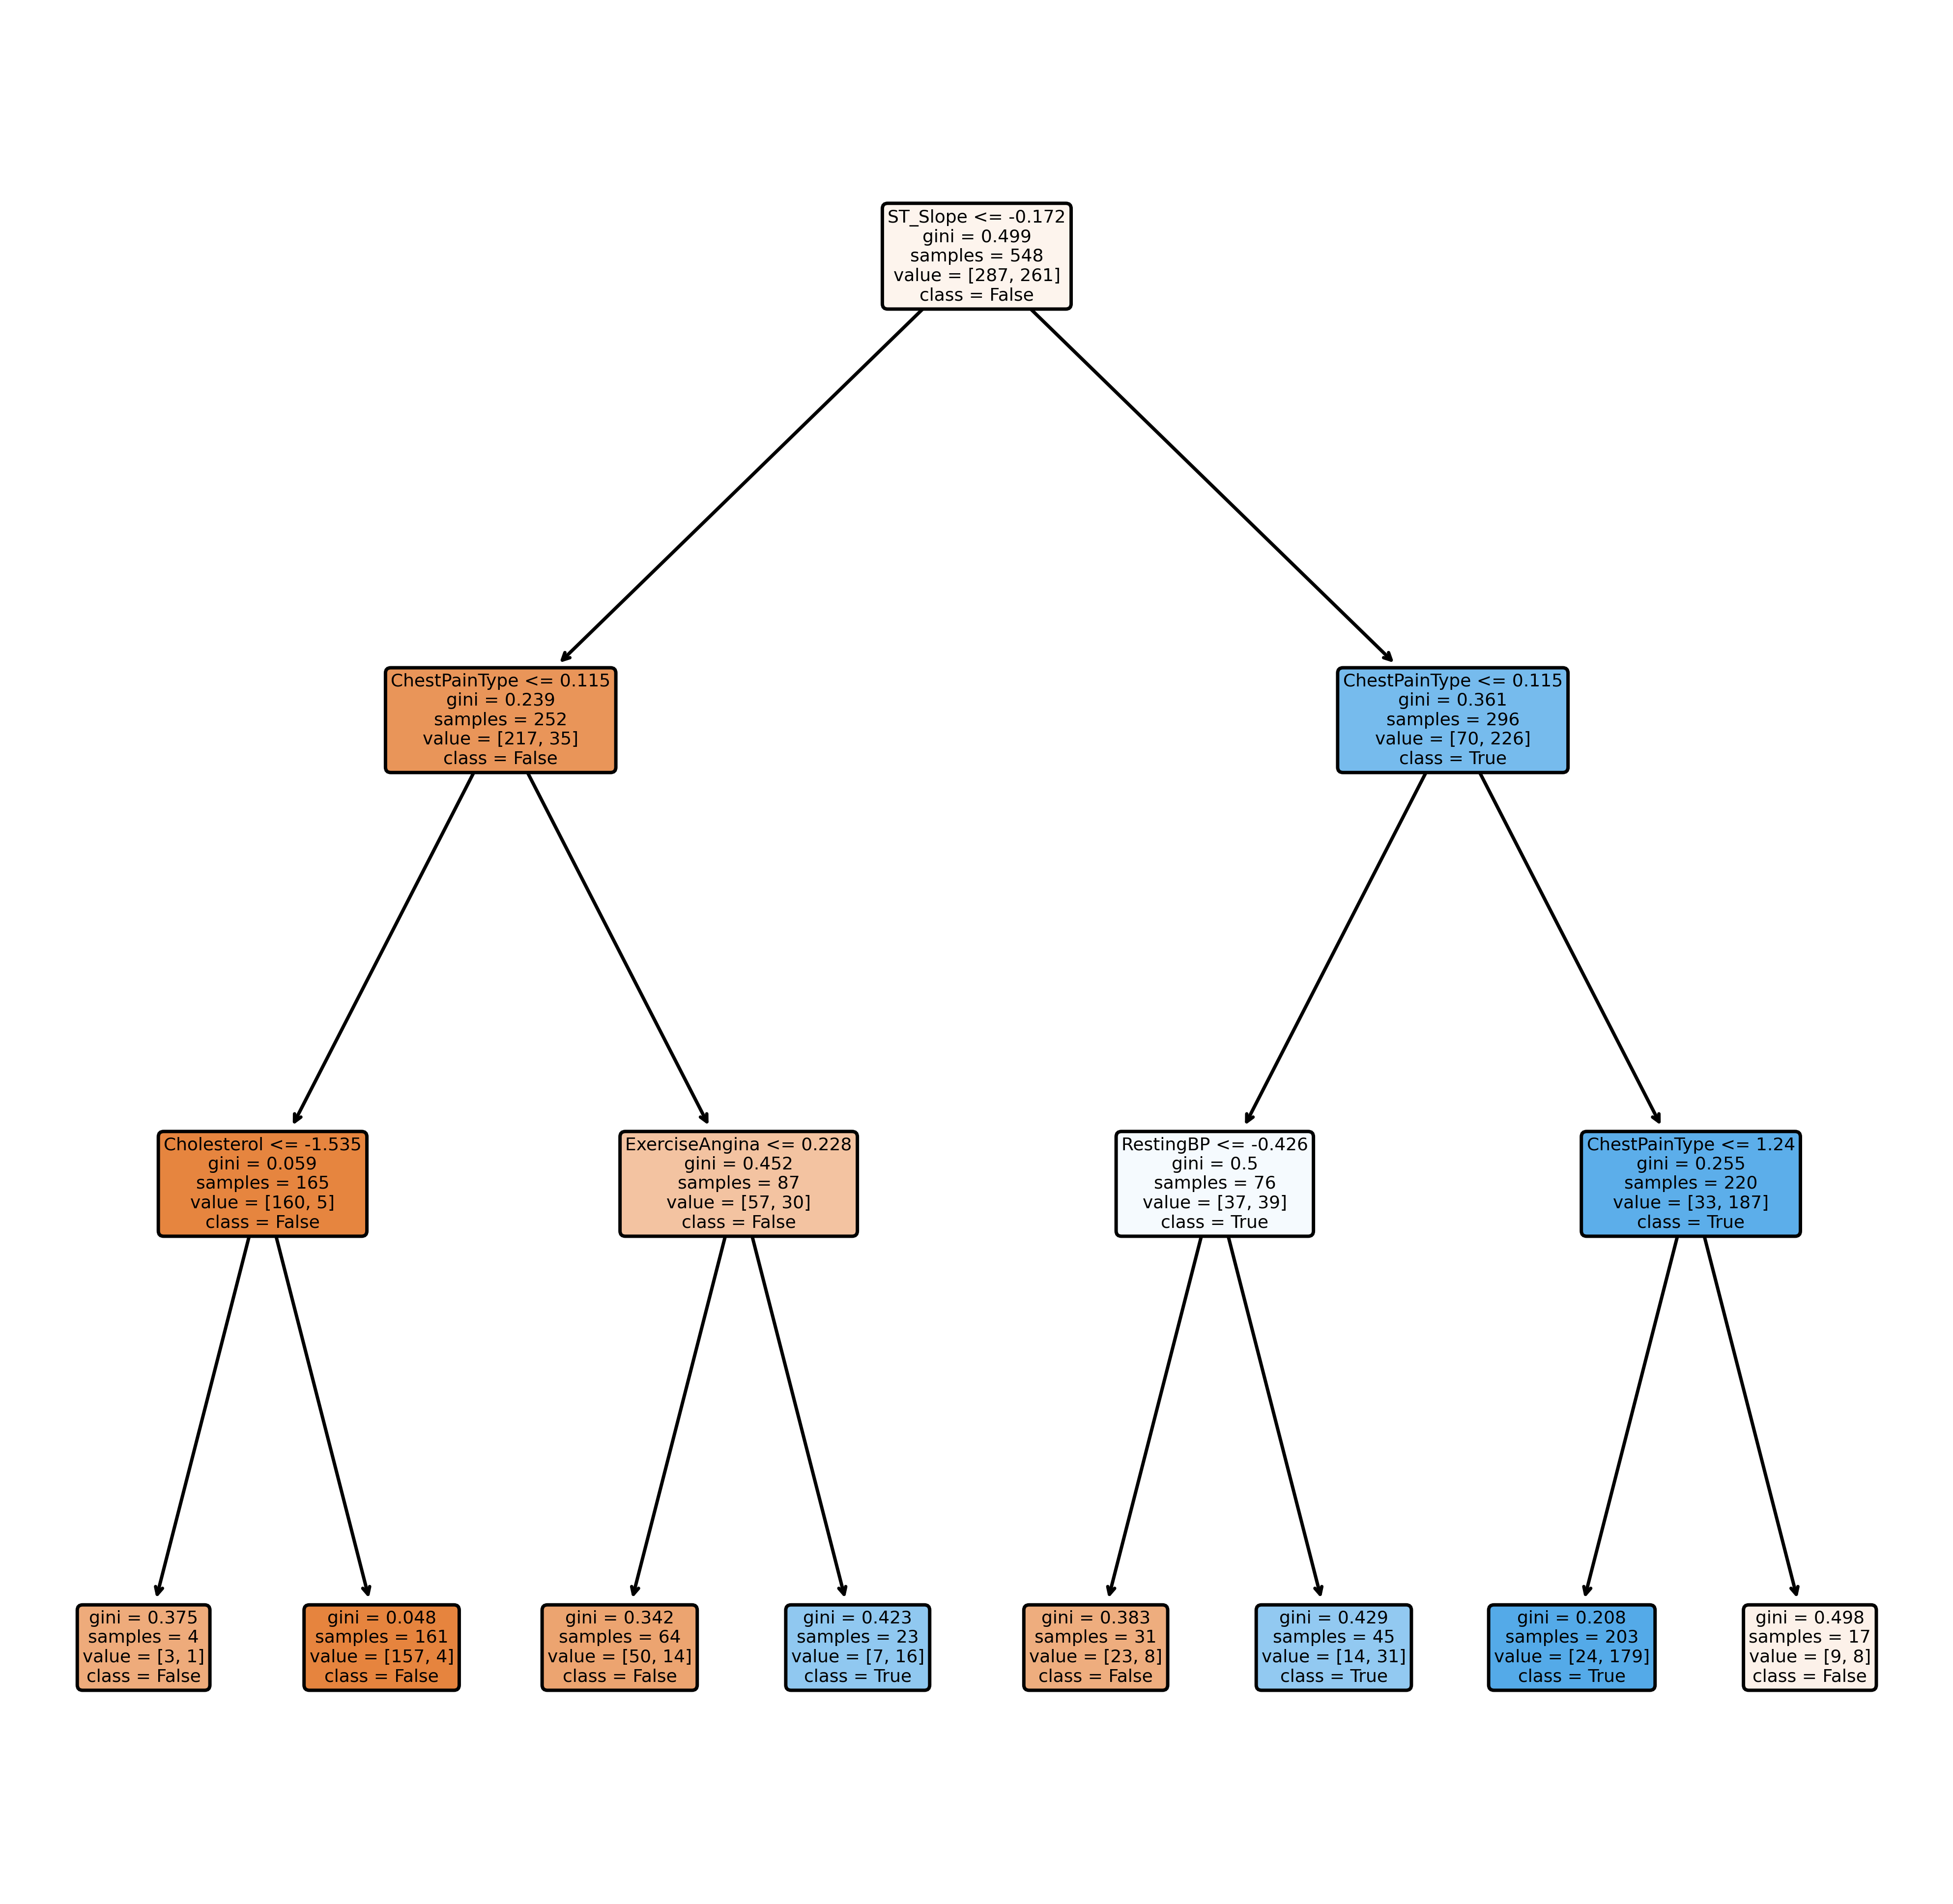

In [9]:
#tree.plot_tree(clf, feature_names = df.columns, filled = True, rounded=True, max_depth = 2)
# Setting dpi = 300 to make image clearer than default
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,10), dpi=500)

tree.plot_tree(clf,
           feature_names = df.columns, 
           class_names=['False', 'True'],
           filled = True, rounded=True, max_depth = 3);

fig.savefig('decisionTree.png')

## Interpretation:
A True result here means that the person is prone to heave a heart failure. We note the followings:
- Most important features are: ST_Slope, ChestPainType, ExerciseAngina and RestingBP.
- ST_Slope is the most important one among them.
- Most nodes depend on the catagorical data, and we recall the transformation made to their values into a metric space.

In addition, in order to be classified as True, we check the following:
First we check the ST_Slope:
- If it is 'UP', then the result is True if ChectPainType not 'ATA', and ExerciseAngina is 'Y'
- If it is 'Flat' or 'Down' then check ChestPainType:
  - If 'ATA' then the result is True (RestingBP always positive)
  - Else, the result is True if ChectPainType is 'ATA' or 'TA'

## Random Forest

In [10]:
rf = RandomForestClassifier(n_estimators=300, max_depth=6)
rf.fit(X_train,y_train)

# random forest accuracy
rf_acc_train = round(rf.score(X_train,y_train) *100, 2)
rf_acc_test = round(rf.score(X_test,y_test)*100, 2) 

print('Accuracy of Random Forest classifier on training set: {:.2f}'
     .format(rf_acc_train))
print('Accuracy of Random Forest classifier on test set: {:.2f}'
     .format(rf_acc_test))

# recall calculation
y_preds = rf.predict(X_test)
recall_rf = round(recall_score(y_test, y_preds)*100, 2)

print('Recall of Random forest classifier: {:.2f}'.format(recall_rf))

Accuracy of Random Forest classifier on training set: 94.34
Accuracy of Random Forest classifier on test set: 89.62
Recall of Random forest classifier: 88.76


# Algorithms Comparison


In [11]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'Logistic Regression', 'KNN', 'Decision Tree',
              'Random Forest'],
'Recall': [recall_svm, recall_logreg, recall_knn, recall_clf, recall_rf], 
'Accuracy': [svm_acc_test, logreg_acc_test, knn_acc_test, clf_acc_test, rf_acc_test]})
models.sort_values(by='Recall', ascending=False)

,Model,Recall,Accuracy
0,Support Vector Machines,91.01,90.71
2,KNN,88.76,88.52
4,Random Forest,88.76,89.62
1,Logistic Regression,86.52,87.98
3,Decision Tree,80.90,81.97


# Conclusions:
1. The maximal Recall score is obtained by SVM classifier and is equal to 91%. Thus, this classifier may be a good fit for future heart failure detection.
2. The tree visualization yiels the most important features in its classification - ST_Slope, ChestPainType, ExerciseAngina and RestingBP, and thier path.